<a href="https://colab.research.google.com/github/spdr-lily/analise-fatorial-exploratoria-com-Barlett-e-KMO/blob/main/analise_fatorial_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de Bibliotecas e configuração inicial

In [2]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=a473fb501ea2b315e843cb0577882591938a246176690840b358201f6703a7fc
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [12]:
# importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [13]:
# gerando dados fictícios (simulação de estrutura latente)
np.random.seed(42)
n_amostras = 500
n_fatores_reais = 3 # simulando 3 traços de personalidade
n_itens = 14 # 5 perguntas para cada traço

# Geração e Formatação dos Dados

In [14]:
# criando pontuações latentes para os 3 fatores (distribuição normal)
latentes = np.random.normal(0, 1, (n_amostras, n_fatores_reais))

# criando uma matriz de cargas (loadings) simulada
cargas = np.zeros((n_itens, n_fatores_reais))
cargas[0:5, 0] = 0.8
cargas[5:10, 1] = 0.8
cargas[10:15, 2] = 0.8

# gerando respostas: latentes * cargas + ruído
dados = np.dot(latentes, cargas.T) + np.random.normal(0, 0.5, (n_amostras, n_itens))

# convertendo para escala Likert (1 a 5) e DataFrame
dados_likert = np.clip(np.round(dados + 3), 1, 5)
cols = [f'Q{i+1}' for i in range(n_itens)]
df = pd.DataFrame(dados_likert, columns=cols)

# Pré-Testes (Adequabilidade)

In [15]:
from scipy.stats import chi
# Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f'Barlett p-value: {p_value: .4f} (Deve ser < 0.05)')

#KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f'KMO Global: {kmo_model: .3f} (Deve ser > 0.6)')

Barlett p-value:  0.0000 (Deve ser < 0.05)
KMO Global:  0.869 (Deve ser > 0.6)


# Definição do Número de Fatores (Scree Plot)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


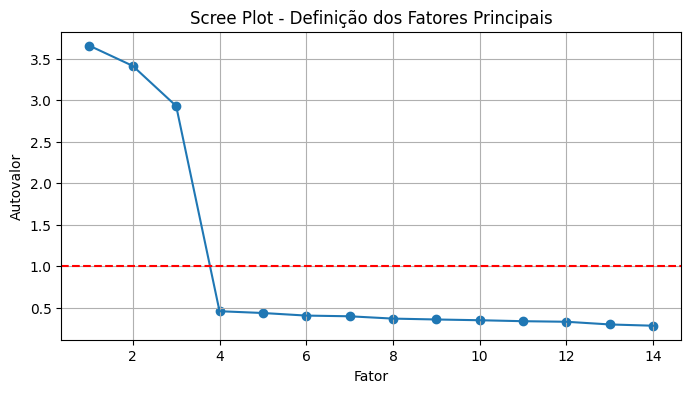

Scree Plot salvo como 'scree_plot.png'
------------------------------


In [18]:
fa_check = FactorAnalyzer(rotation=None)
fa_check.fit(df)
ev, v = fa_check.get_eigenvalues()

plt.figure(figsize=(8, 4))
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
# titulo
plt.title('Scree Plot - Definição dos Fatores Principais')
plt.xlabel('Fator')
plt.ylabel('Autovalor')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
# salvando a imagem
plt.savefig('scree_plot.png')
plt.show()

print("Scree Plot salvo como 'scree_plot.png'")
print("-" * 30)

# Análise Fatorial Final e Visualização

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


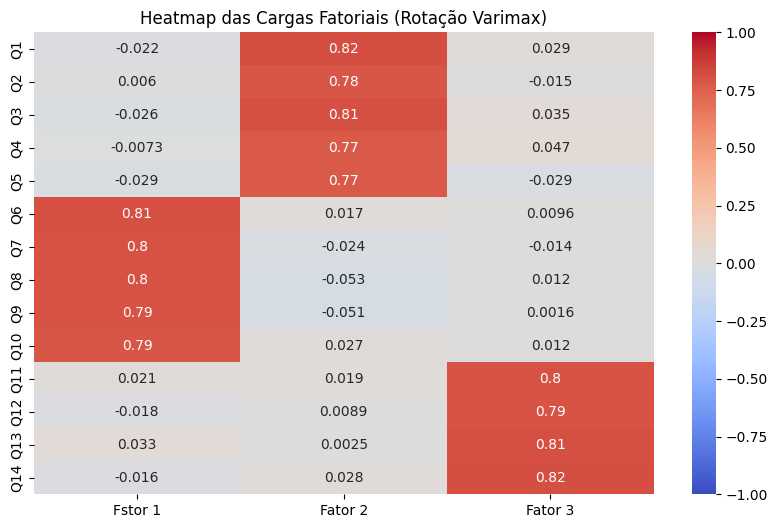

Heatmap salvo como 'heatmap_cargas_fatoriais.png'


In [19]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(df)

loadings = pd.DataFrame(fa.loadings_,
                        index=df.columns,
                        columns=['Fstor 1', 'Fator 2', 'Fator 3'])

plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
# titulo do grafico
plt.title('Heatmap das Cargas Fatoriais (Rotação Varimax)')
# salvando o gráfico
plt.savefig('heatmap_cargas_fatoriais.png')
plt.show()

print("Heatmap salvo como 'heatmap_cargas_fatoriais.png'")